In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
import time

In [5]:
from sklearn.metrics import confusion_matrix

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
train_labels = pd.read_csv("/content/drive/MyDrive/DataDcience/train_labels_preprocessed.csv")
train_values = pd.read_csv("/content/drive/MyDrive/DataDcience/train_values_preprocessed.csv")

In [9]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [10]:
train_labels["damage_grade"] = train_labels["damage_grade"] - 1
train_labels.head()

,damage_grade
0,2
1,1
2,2
3,1
4,2


In [11]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 3)

In [12]:
train_labels

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [13]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,0.500000,0.357143,0.428571,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,0.166667,0.500000,0.714286,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,0.166667,0.285714,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,0.166667,0.357143,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,0.500000,0.500000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size = 0.2, random_state = 42)

In [15]:
model = Sequential([
    Input(shape = (60)),
    Dense(128, activation='relu', use_bias=False),
    Dense(256, activation='relu', use_bias=False),
    Dense(128, activation='relu', use_bias=False),
    Dense(64, activation='relu', use_bias=False),
    Dense(3, activation='softmax', use_bias=False)
]) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
early_stopping=EarlyStopping(patience=16, verbose=1)

checkpointer=ModelCheckpoint(filepath='weights.hdf5', save_best_only=True, verbose=1)

start_time = time.time()
network_history = model.fit(X_train, y_train, batch_size=64, 
                            epochs=100, verbose=1, validation_split=0.2,
                  callbacks=[checkpointer, early_stopping])
dt_time_fit = time.time() - start_time

Epoch 1/100
2605/2606 [============================>.] - ETA: 0s - loss: 2.5791 - accuracy: 0.4922
Epoch 1: val_loss improved from inf to 0.95975, saving model to weights.hdf5
2606/2606 [==============================] - 14s 5ms/step - loss: 2.5785 - accuracy: 0.4922 - val_loss: 0.9598 - val_accuracy: 0.5672
Epoch 2/100
2606/2606 [==============================] - ETA: 0s - loss: 0.9432 - accuracy: 0.5329
Epoch 2: val_loss improved from 0.95975 to 0.94369, saving model to weights.hdf5
2606/2606 [==============================] - 13s 5ms/step - loss: 0.9432 - accuracy: 0.5329 - val_loss: 0.9437 - val_accuracy: 0.5661
Epoch 3/100
2601/2606 [============================>.] - ETA: 0s - loss: 0.8921 - accuracy: 0.5577
Epoch 3: val_loss improved from 0.94369 to 0.86459, saving model to weights.hdf5
2606/2606 [==============================] - 13s 5ms/step - loss: 0.8919 - accuracy: 0.5577 - val_loss: 0.8646 - val_accuracy: 0.5706
Epoch 4/100
2598/2606 [============================>.] - ETA: 

In [17]:
from keras.models import load_model
model = load_model("weights.hdf5")

In [18]:
start_time = time.time()
predictions_test = model.predict(X_test)
dt_time_pred = time.time() - start_time

1629/1629 [==============================] - 3s 2ms/step


In [19]:
print(predictions_test)

[[0.02081234 0.5491795  0.4300082 ]
 [0.0177356  0.5115659  0.47069845]
 [0.02229356 0.6843124  0.29339406]
 ...
 [0.01263611 0.64244425 0.3449196 ]
 [0.01183403 0.46602407 0.52214175]
 [0.15455173 0.7137409  0.1317074 ]]


In [20]:
predictions_test.shape

(52121, 3)

In [21]:
predictions_test = predictions_test.argmax(axis=1)
predictions_test 

array([1, 1, 1, ..., 1, 2, 1])

In [22]:
predictions_test = predictions_test + 1
predictions_test

array([2, 2, 2, ..., 2, 3, 2])

In [23]:
y_test = y_test.argmax(axis=1)
y_test 

array([1, 1, 1, ..., 2, 2, 1])

In [24]:
y_test = y_test + 1
y_test

array([2, 2, 2, ..., 3, 3, 2])

In [25]:
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Precision: ", metrics.precision_score(y_test,predictions_test, average='micro'))
print("Recall: ", metrics.recall_score(y_test,predictions_test,average='micro'))
print("Accuracy: ", metrics.accuracy_score(y_test,predictions_test))
print("F1_score: ", metrics.f1_score(y_test,predictions_test, average='micro'))

Fit Time: 1184.6432104110718 seconds
Prediction Time: 3.461582899093628 seconds
Precision:  0.6451142533719614
Recall:  0.6451142533719614
Accuracy:  0.6451142533719614
F1_score:  0.6451142533719614


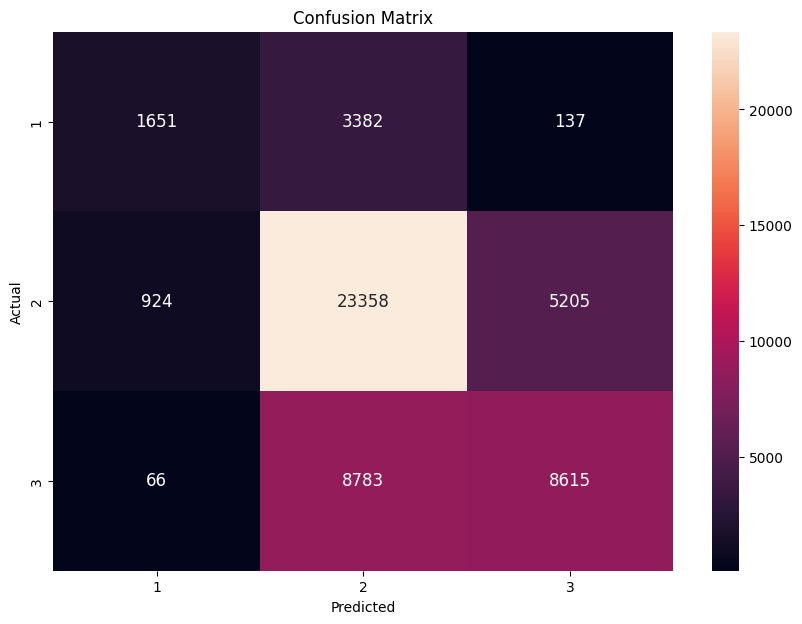

In [26]:
data = confusion_matrix(y_test,predictions_test)
cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.show()